<a href="https://colab.research.google.com/github/ORCT/ds-section2-project/blob/main/04.%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 4. 모델링
- 사용할 특성 선택
- 타겟 설정
- 모델 비교 및 성능 확인
- 최종 모델 선정


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install category_encoders
!pip3 install pdpbox

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from pdpbox.pdp import pdp_isolate, pdp_plot
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv('main_df_fin.csv')
df

,Match_Id,Track,Name,Rank,Time,Kart,드리프트,가속력,코너링,부스터시간,부스터충전량
0,Color맥라렌/1,차이나 라사,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
1,Color맥라렌/1,차이나 라사,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
2,Color맥라렌/1,차이나 라사,하이럼스미스,3.0,110.66,나이트 세이버 V1,1050.0,1024.0,965.0,950.0,600.0
3,Color맥라렌/2,네모 장난감 선물공장,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
4,Color맥라렌/2,네모 장난감 선물공장,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
...,...,...,...,...,...,...,...,...,...,...,...
9047,까이브/99,월드 이탈리아 피사의 사탑,l지존지후l,4.0,69.49,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
9048,까이브/100,월드 두바이 다운타운,YJWP,1.0,67.20,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
9049,까이브/100,월드 두바이 다운타운,뱩소현,2.0,67.25,스펙터 V1,1105.0,1105.0,1040.0,1005.0,490.0
9050,까이브/100,월드 두바이 다운타운,까이브,3.0,69.02,렉키 V1,1020.0,1020.0,965.0,780.0,880.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9052 entries, 0 to 9051
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Match_Id  9052 non-null   object 
 1   Track     9052 non-null   object 
 2   Name      9052 non-null   object 
 3   Rank      9052 non-null   float64
 4   Time      9052 non-null   float64
 5   Kart      9052 non-null   object 
 6   드리프트      9052 non-null   float64
 7   가속력       9052 non-null   float64
 8   코너링       9052 non-null   float64
 9   부스터시간     9052 non-null   float64
 10  부스터충전량    9052 non-null   float64
dtypes: float64(7), object(4)
memory usage: 778.0+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()[df.isna().sum() !=0]/len(df)

Series([], dtype: float64)

In [7]:
df.nunique()

Match_Id    2784
Track         99
Name          80
Rank           4
Time          89
Kart          15
드리프트           8
가속력            5
코너링           10
부스터시간          7
부스터충전량        11
dtype: int64

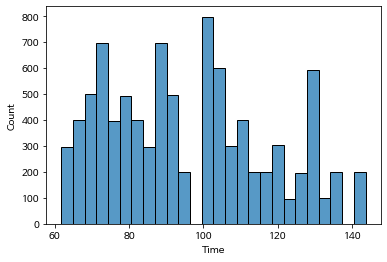

In [8]:
sns.histplot(df.Time)

In [9]:
df.corr()['Time'].sort_values(ascending=False)

Time      1.000000
Rank      0.132766
부스터시간     0.054923
가속력      -0.055326
드리프트     -0.093682
부스터충전량   -0.098321
코너링      -0.161547
Name: Time, dtype: float64

In [10]:
df.drop(['Match_Id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9052 entries, 0 to 9051
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Track   9052 non-null   object 
 1   Name    9052 non-null   object 
 2   Rank    9052 non-null   float64
 3   Time    9052 non-null   float64
 4   Kart    9052 non-null   object 
 5   드리프트    9052 non-null   float64
 6   가속력     9052 non-null   float64
 7   코너링     9052 non-null   float64
 8   부스터시간   9052 non-null   float64
 9   부스터충전량  9052 non-null   float64
dtypes: float64(7), object(3)
memory usage: 707.3+ KB


In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

def xy_split(df):
  target = 'Time'
  X = df.iloc[:,5:]
  # X = df.drop(target, axis=1)
  y = df[target]
  return X, y

X_train, y_train = xy_split(train)
X_test, y_test = xy_split(test)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7241, 5), (1811, 5), (7241,), (1811,))

In [13]:
baseline = [y_train.mean()] * len(y_train)

linear = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LinearRegression(),
)

linear.fit(X_train, y_train)

ridge = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    Ridge(
        # alpha=0.01
    )
)

ridge_clf = RandomizedSearchCV(
    ridge,
    param_distributions = {'ridge__alpha' : [0.002, 0.004, 0.006, 0.008, 0.01]},
    # param_distributions = {'ridge__alpha' : range(1,100,10)},
    n_iter=5,
    cv=3,
    scoring='r2',
    # scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

ridge_clf.fit(X_train, y_train)
print("Optimal Hyperparameter:", ridge_clf.best_params_)
print("R2:", ridge_clf.best_score_)

lasso = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    Lasso(
        # alpha=0.01
    )
)

lasso_clf = RandomizedSearchCV(
    lasso,
    param_distributions = {'lasso__alpha' : [0.002, 0.004, 0.006, 0.008, 0.01]},
    # param_distributions = {'lasso__alpha' : range(1,100,10)},
    n_iter=5,
    cv=3,
    scoring='r2',
    # scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

lasso_clf.fit(X_train, y_train)
print("Optimal Hyperparameter:", lasso_clf.best_params_)
print("R2:", lasso_clf.best_score_)

Optimal Hyperparameter: {'ridge__alpha': 0.01}
R2: 0.07115896397312586
Optimal Hyperparameter: {'lasso__alpha': 0.002}
R2: 0.07115789276314229


In [14]:
def eval_models(y, y_pred) :
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return mse, rmse, mae, r2

In [15]:
base_mse, base_rmse, base_mae, base_r2 = eval_models(y_test, [y_test.mean()] * len(y_test))
linear_mse, linear_rmse, linear_mae, linear_r2 = eval_models(y_test, linear.predict(X_test))
ridge_mse, ridge_rmse, ridge_mae, ridge_r2 = eval_models(y_test, ridge_clf.predict(X_test))
lasso_mse, lasso_rmse, lasso_mae, lasso_r2 = eval_models(y_test, lasso_clf.predict(X_test))

In [16]:
comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Linear', 'Ridge', 'Lasso'])
comparison_metrics['Base'] = [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Linear'] = [linear_mse, linear_rmse, linear_mae, linear_r2]
comparison_metrics['Ridge'] = [ridge_mse, ridge_rmse, ridge_mae, ridge_r2]
comparison_metrics['Lasso'] = [lasso_mse, lasso_rmse, lasso_mae, lasso_r2]
comparison_metrics

,Base,Linear,Ridge,Lasso
mse,434.410327,405.169591,405.169505,405.158437
rmse,20.842513,20.128825,20.128823,20.128548
mae,17.869706,16.821222,16.821216,16.819594
r2,0.000000,0.067311,0.067312,0.067337


lasso모델이 오차도 적고 R2스코어도 적당하고 높았으므로 최종 모델로 채택

이제 특성 해석하고 시각화하자.

특성 중요도 같은걸로 어떤 특성이 기록 감소에 영향을 많이 미치는지를 통해서 가설 2를 해결 가능할 것 같다.

최적의 하이퍼파라미터도 찾았으므로 이제 전체 데이터에 대해서 학습을 진행하고 특성중요도 등을 파악하자.

In [17]:
X = df.iloc[:,5:]
y = df['Time']

In [18]:
alphas = [0.002, 0.004, 0.006, 0.008, 0.01]

lasso_final = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_final.fit(X, y)

lasso_final_coef = lasso_final.coef_

print(f'alpha: {lasso_final.alpha_}')
print(f'cv best score: {lasso_final.score(X, y)}')

alpha: 0.01
cv best score: 0.07375215016616343


lasso 회귀계수 최대값 : 0.037673508902948516
lasso 회귀계수 평균 : -0.07159757992245372


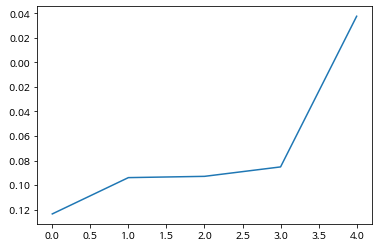

In [19]:
# 회귀계수를 확인해보겠습니다. 
print(f'lasso 회귀계수 최대값 : {lasso_final_coef.max()}\nlasso 회귀계수 평균 : {lasso_final_coef.mean()}')
lasso_final_coef.sort()
plt.plot(lasso_final_coef)
plt.show()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa44b5d5390>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa44b583350>})

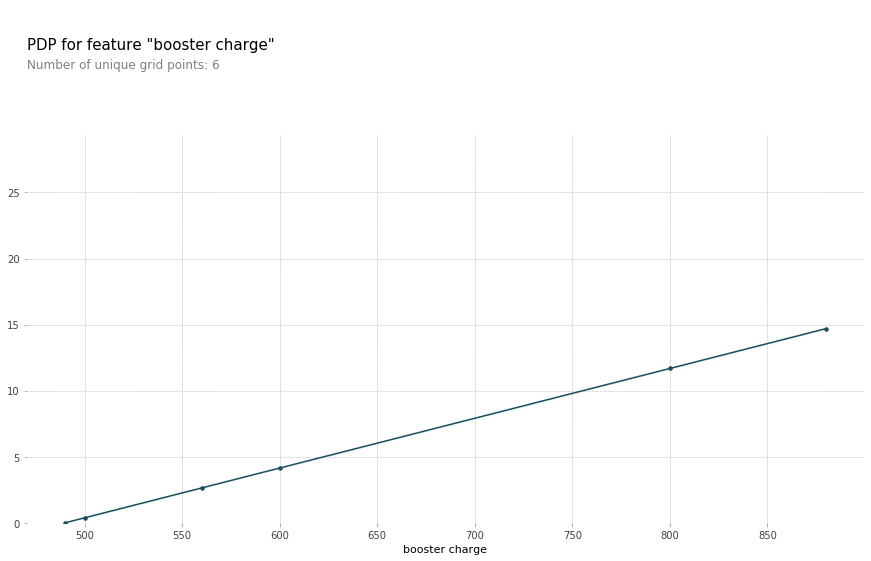

In [33]:
target_feature = '부스터충전량'
isolated = pdp_isolate(
    model=lasso_final,
    dataset=X,
    model_features=X.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name='booster charge')